# 01 - Data Preparation

The dataset consists of apartment records with the following features:

unit_id – Unique (and anonymized) identifier for each apartment.\
obj_type – Type of apartment or object (categorical, anonymized).\
dim_m2 – Apartment size in square meters.\
n_rooms – Number of rooms.\
floor_no – The floor on which the apartment is located.\
floor_max – Total number of floors in the building.\
year_built – The year the building was constructed.\
dist_centre – Distance from the apartment to the city center.\
n_poi – Number of points of interest nearby.\
dist_sch – Distance to the nearest school.\
dist_clinic – Distance to the nearest clinic.\
dist_post – Distance to the nearest post office.\
dist_kind – Distance to the nearest kindergarten.\
dist_rest – Distance to the nearest restaurant.\
dist_uni – Distance to the nearest college or university.\
dist_pharma – Distance to the nearest pharmacy.\
own_type – Ownership type (categorical, anonymized).\
build_mat – Building material (categorical, anonymized).\
cond_class – Condition or quality class of the apartment (categorical, anonymized).\
has_park – Whether the apartment has a parking space (boolean).\
has_balcony – Whether the apartment has a balcony (boolean).\
has_lift – Whether the apartment building has an elevator (boolean).\
has_sec – Whether the apartment has security features (boolean).\
has_store – Whether the apartment has a storage room (boolean).\
price_z – Target variable: Apartment price (in appropriate monetary units) to be predicted – only in the training sample\
src_month – Source month (time attribute).\
loc_code – Anonymized location code of the apartment.\
market_volatility – Simulated market fluctuation affecting the apartment price.\
infrastructure_quality – Indicator of the building’s infrastructure quality, partially based on the building’s age.\
neighborhood_crime_rate – Random index simulating local crime rate.\
popularity_index – Randomly generated measure of the apartment’s attractiveness.\
green_space_ratio – Proxy variable representing the amount of nearby green space, inversely related to the distance from the city center.\
estimated_maintenance_cost – Estimated cost of maintaining the apartment, based on its size.\
global_economic_index – Simulated economic index with minor fluctuations across entries, reflecting broader market conditions.

In [162]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

import pickle
import warnings
from pathlib import Path
import matplotlib.ticker as mtick

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [8]:
warnings.filterwarnings('ignore')

In [10]:
file_path = Path('../Data/appartments_train.csv')

In [18]:
df = pd.read_csv(file_path, sep = ',')

df.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
0,a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,...,519626.21,2023-09,693f303c,501710.76,14.02,95.39,44.51,0.999,13.99,100.291946
1,23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,...,162959.26,2024-04,8d5a4f0c,147763.87,110.55,46.17,56.25,1.000,7.59,91.315644
2,d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,...,1167571.51,2023-10,693f303c,1042847.59,31.15,18.94,50.36,0.999,21.14,93.681619
3,280aced4655b7a96,2a6d5c01,53.68,2.0,NaN,4.0,2018.0,10.589,30.0,0.729,...,907071.16,2024-01,693f303c,728839.39,7.52,11.84,46.69,0.999,7.91,94.192062
4,2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,...,1080383.19,2023-11,693f303c,1263171.15,11.20,89.64,45.60,0.999,8.63,96.166051


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156454 entries, 0 to 156453
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unit_id                     156454 non-null  object 
 1   obj_type                    122634 non-null  object 
 2   dim_m2                      156454 non-null  float64
 3   n_rooms                     156454 non-null  float64
 4   floor_no                    128756 non-null  float64
 5   floor_max                   154533 non-null  float64
 6   year_built                  130741 non-null  float64
 7   dist_centre                 156454 non-null  float64
 8   n_poi                       156454 non-null  float64
 9   dist_sch                    156324 non-null  float64
 10  dist_clinic                 155883 non-null  float64
 11  dist_post                   156266 non-null  float64
 12  dist_kind                   156291 non-null  float64
 13  dist_rest     

In [22]:
df.shape

(156454, 34)

In [24]:
df.describe()

,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,...,dist_uni,dist_pharma,price_z,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
count,156454.000000,156454.000000,128756.000000,154533.000000,130741.000000,156454.000000,156454.000000,156324.000000,155883.000000,156266.000000,...,152137.000000,156235.000000,1.564540e+05,1.564540e+05,130741.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000
mean,58.702447,2.678634,3.334749,5.312859,1986.010532,4.357027,20.611509,0.413302,0.970588,0.516677,...,1.444837,0.358150,7.848080e+05,7.845504e+05,38.099861,49.878525,50.015030,0.999626,17.600377,99.671328
std,23.278725,0.916015,2.535675,3.311659,33.792722,2.900580,24.212745,0.469380,0.901307,0.505063,...,1.124728,0.462408,4.301655e+05,4.422421e+05,37.007349,28.842192,10.033264,0.000489,10.064985,5.879228
min,18.780000,1.000000,1.000000,1.000000,1850.000000,0.008000,0.000000,0.002000,0.001000,0.001000,...,0.004000,0.001000,1.196369e+05,1.012951e+05,0.000000,0.000000,7.830000,0.998000,2.060000,89.913197
25%,42.240000,2.000000,2.000000,3.000000,1967.000000,2.000000,7.000000,0.174000,0.353000,0.236000,...,0.569000,0.140000,5.027801e+05,4.931332e+05,7.990000,24.880000,43.270000,0.999000,10.190000,93.801401
50%,54.240000,3.000000,3.000000,4.000000,1994.000000,3.935000,14.000000,0.288000,0.669000,0.392000,...,1.110000,0.238000,6.901935e+05,6.854957e+05,27.530000,49.840000,49.990000,1.000000,15.560000,100.374251
75%,69.820000,3.000000,4.000000,6.000000,2016.000000,6.128000,24.000000,0.469000,1.245000,0.623000,...,2.067000,0.407000,9.450128e+05,9.498584e+05,58.250000,74.880000,56.790000,1.000000,22.660000,105.234633
max,187.310000,6.000000,29.000000,29.000000,2024.000000,19.686000,212.000000,5.718000,5.818000,5.864000,...,5.982000,5.752000,3.921745e+06,4.666297e+06,252.720000,100.000000,95.360000,1.000000,87.200000,109.224288


In [28]:
df.isnull().sum()

unit_id                            0
obj_type                       33820
dim_m2                             0
n_rooms                            0
floor_no                       27698
floor_max                       1921
year_built                     25713
dist_centre                        0
n_poi                              0
dist_sch                         130
dist_clinic                      571
dist_post                        188
dist_kind                        163
dist_rest                        391
dist_uni                        4317
dist_pharma                      219
own_type                           0
build_mat                      61999
cond_class                    117058
has_park                           0
has_balcony                        0
has_lift                        7727
has_sec                            0
has_store                          0
price_z                            0
src_month                          0
loc_code                           0
m

In [30]:
df.duplicated().sum()

0

In [32]:
df.nunique()

unit_id                        82491
obj_type                           3
dim_m2                         12282
n_rooms                            6
floor_no                          27
floor_max                         29
year_built                       165
dist_centre                    13483
n_poi                            195
dist_sch                        3612
dist_clinic                     4908
dist_post                       3800
dist_kind                       3573
dist_rest                       3556
dist_uni                        5538
dist_pharma                     3582
own_type                           3
build_mat                          2
cond_class                         2
has_park                           2
has_balcony                        2
has_lift                           2
has_sec                            2
has_store                          2
price_z                       156331
src_month                         11
loc_code                          15
m

In [34]:
df.dtypes

unit_id                        object
obj_type                       object
dim_m2                        float64
n_rooms                       float64
floor_no                      float64
floor_max                     float64
year_built                    float64
dist_centre                   float64
n_poi                         float64
dist_sch                      float64
dist_clinic                   float64
dist_post                     float64
dist_kind                     float64
dist_rest                     float64
dist_uni                      float64
dist_pharma                   float64
own_type                       object
build_mat                      object
cond_class                     object
has_park                       object
has_balcony                    object
has_lift                       object
has_sec                        object
has_store                      object
price_z                       float64
src_month                      object
loc_code    

In [42]:
columns_with_missings = df.columns[df.isnull().any()]

In [44]:
columns_with_missings

Index(['obj_type', 'floor_no', 'floor_max', 'year_built', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'build_mat', 'cond_class', 'has_lift',
       'infrastructure_quality'],
      dtype='object')

In [48]:
df[columns_with_missings].head()

,obj_type,floor_no,floor_max,year_built,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,build_mat,cond_class,has_lift,infrastructure_quality
0,0d6c4dfc,1.0,4.0,1999.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,NaN,NaN,yes,14.02
1,0c238f18,1.0,2.0,1940.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,7ceffe3b,NaN,no,110.55
2,0d6c4dfc,1.0,2.0,2000.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,NaN,NaN,no,31.15
3,2a6d5c01,NaN,4.0,2018.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,7ceffe3b,a2881958,yes,7.52
4,2a6d5c01,2.0,3.0,2015.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,7ceffe3b,a2881958,yes,11.20


In [50]:
df[columns_with_missings].isnull().sum()

obj_type                   33820
floor_no                   27698
floor_max                   1921
year_built                 25713
dist_sch                     130
dist_clinic                  571
dist_post                    188
dist_kind                    163
dist_rest                    391
dist_uni                    4317
dist_pharma                  219
build_mat                  61999
cond_class                117058
has_lift                    7727
infrastructure_quality     25713
dtype: int64

In [54]:
# quantitative variables
df_numerical_variables = df.select_dtypes(include = [np.number]).columns
df_numerical_variables

Index(['dim_m2', 'n_rooms', 'floor_no', 'floor_max', 'year_built',
       'dist_centre', 'n_poi', 'dist_sch', 'dist_clinic', 'dist_post',
       'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma', 'price_z',
       'market_volatility', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index'],
      dtype='object')

In [56]:
# qualitative variables
df_categorical_variables = df.select_dtypes('object').columns
df_categorical_variables

Index(['unit_id', 'obj_type', 'own_type', 'build_mat', 'cond_class',
       'has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store',
       'src_month', 'loc_code'],
      dtype='object')

In [60]:
df[df_numerical_variables].corr()

,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,...,dist_uni,dist_pharma,price_z,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
dim_m2,1.000000,0.763365,-0.067677,-0.123550,-0.013937,0.042232,0.034440,0.062255,0.013766,0.053453,...,0.031970,0.054945,0.563239,0.548068,0.014935,-0.001639,0.002971,-0.040085,0.690743,-0.017622
n_rooms,0.763365,1.000000,-0.035823,-0.078455,0.005164,0.051075,0.002756,0.067386,0.039393,0.060387,...,0.047288,0.063276,0.472877,0.459598,-0.002240,-0.002055,0.000518,-0.045972,0.527112,-0.013549
floor_no,-0.067677,-0.035823,1.000000,0.665670,0.064715,-0.025474,0.032439,-0.101636,-0.121444,-0.075030,...,-0.052271,-0.100559,0.021565,0.021967,-0.059814,-0.004892,-0.002454,0.014444,-0.046116,0.008019
floor_max,-0.123550,-0.078455,0.665670,1.000000,0.126588,-0.039538,0.040917,-0.139826,-0.176904,-0.104399,...,-0.078968,-0.136240,0.030829,0.030523,-0.116116,0.000566,-0.002986,0.020989,-0.086002,0.012653
year_built,-0.013937,0.005164,0.064715,0.126588,1.000000,0.356108,-0.379946,0.258050,0.247954,0.232267,...,0.350893,0.195440,0.133156,0.128910,-0.918141,-0.001806,-0.001392,-0.303103,-0.010516,0.001622
dist_centre,0.042232,0.051075,-0.025474,-0.039538,0.356108,1.000000,-0.445617,0.279881,0.416199,0.252634,...,0.522317,0.242953,0.083120,0.080992,-0.326663,-0.002751,0.004323,-0.826293,0.029807,0.011883
n_poi,0.034440,0.002756,0.032439,0.040917,-0.379946,-0.445617,1.000000,-0.302156,-0.363999,-0.316975,...,-0.433926,-0.295604,0.175313,0.170250,0.349903,0.000734,-0.002754,0.309772,0.022336,-0.004053
dist_sch,0.062255,0.067386,-0.101636,-0.139826,0.258050,0.279881,-0.302156,1.000000,0.552290,0.742249,...,0.428372,0.788256,-0.000169,0.000313,-0.236978,-0.001128,-0.000389,-0.275326,0.042754,-0.000502
dist_clinic,0.013766,0.039393,-0.121444,-0.176904,0.247954,0.416199,-0.363999,0.552290,1.000000,0.488602,...,0.475459,0.504567,-0.101334,-0.098969,-0.227934,-0.000164,0.001046,-0.380459,0.010327,0.004976
dist_post,0.053453,0.060387,-0.075030,-0.104399,0.232267,0.252634,-0.316975,0.742249,0.488602,1.000000,...,0.327293,0.788542,-0.010391,-0.010130,-0.212931,0.002476,-0.000662,-0.230449,0.037009,-0.001929


In [62]:
df[df_numerical_variables].head()

,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,...,dist_uni,dist_pharma,price_z,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
0,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,...,2.243,0.168,519626.21,501710.76,14.02,95.39,44.51,0.999,13.99,100.291946
1,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,...,2.004,0.160,162959.26,147763.87,110.55,46.17,56.25,1.000,7.59,91.315644
2,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,...,2.067,0.575,1167571.51,1042847.59,31.15,18.94,50.36,0.999,21.14,93.681619
3,53.68,2.0,NaN,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,...,2.648,0.147,907071.16,728839.39,7.52,11.84,46.69,0.999,7.91,94.192062
4,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,...,1.043,0.031,1080383.19,1263171.15,11.20,89.64,45.60,0.999,8.63,96.166051


In [68]:
df[df_categorical_variables].head()

,unit_id,obj_type,own_type,build_mat,cond_class,has_park,has_balcony,has_lift,has_sec,has_store,src_month,loc_code
0,a3a463617a5c0439,0d6c4dfc,12631efb,NaN,NaN,yes,yes,yes,no,yes,2023-09,693f303c
1,23a92531fcb238b4,0c238f18,12631efb,7ceffe3b,NaN,yes,yes,no,no,no,2024-04,8d5a4f0c
2,d158671401f9fc34,0d6c4dfc,12631efb,NaN,NaN,no,yes,no,no,yes,2023-10,693f303c
3,280aced4655b7a96,2a6d5c01,12631efb,7ceffe3b,a2881958,yes,no,yes,no,no,2024-01,693f303c
4,2315fa621e746fe4,2a6d5c01,12631efb,7ceffe3b,a2881958,yes,yes,yes,no,no,2023-11,693f303c


## 60/20/20 rule

In [75]:
# 60% train
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=123)  
# 20% valid, 20% test
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=123)  

In [77]:
df_train.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
45366,f13df795472bee05,NaN,59.39,3.0,3.0,4.0,NaN,2.578,19.0,0.326,...,374895.93,2023-12,533f6886,358182.61,NaN,19.44,43.22,1.000,17.98,93.327971
86630,003ffcbd3294c3c9,0d6c4dfc,52.95,2.0,2.0,6.0,2023.0,8.413,13.0,0.387,...,783018.90,2023-12,693f303c,795187.23,1.13,77.42,31.27,0.999,24.08,94.280615
139489,f5d1fc8f4a154cd4,0d6c4dfc,24.55,2.0,2.0,4.0,1993.0,4.479,2.0,0.561,...,635701.75,2024-06,693f303c,599098.08,21.12,90.45,70.33,1.000,9.25,108.618716
24126,02376da3fe009bb0,NaN,57.58,3.0,3.0,3.0,2017.0,13.367,0.0,1.195,...,1292829.86,2024-05,693f303c,1503238.02,8.08,46.21,39.09,0.999,8.48,100.635935
151982,7b6bb74dcdff86a3,2a6d5c01,73.71,3.0,1.0,2.0,2016.0,9.365,0.0,2.159,...,895548.97,2023-10,693f303c,893331.75,9.38,42.41,59.41,0.999,24.94,93.385347


In [79]:
df_valid.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
9765,c5102cb29f3905ed,NaN,79.50,4.0,3.0,7.0,NaN,5.063,4.0,0.369,...,867576.58,2023-12,693f303c,950033.74,NaN,10.93,48.13,0.999,20.33,93.785229
29996,1536c29f037a1d59,0d6c4dfc,33.28,2.0,2.0,4.0,2023.0,5.236,1.0,0.982,...,466111.66,2023-08,378f340c,530229.19,1.48,17.30,44.35,0.999,6.43,105.186755
93432,c6223ed977ebae57,0d6c4dfc,51.33,2.0,NaN,4.0,1950.0,1.157,42.0,0.169,...,760972.90,2023-08,378f340c,774661.31,37.53,35.30,46.29,1.000,20.04,105.352032
119975,dbc11749ecc469d7,0c238f18,53.57,2.0,4.0,5.0,1950.0,1.263,47.0,0.081,...,499984.69,2023-10,6900ba06,568619.77,96.69,76.89,54.82,1.000,17.97,92.699908
35660,e9b6659066fae87f,NaN,54.13,3.0,3.0,3.0,2019.0,6.871,6.0,0.310,...,946152.31,2023-10,0ab06839,1024362.53,5.88,85.27,64.19,0.999,14.11,93.986357


In [85]:
df_test.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
17069,0fe76762ee65128d,0d6c4dfc,47.05,2.0,1.0,8.0,1982.0,4.169,4.0,0.379,...,724269.39,2024-02,0ab06839,681871.90,55.51,46.40,52.14,1.000,17.00,105.378687
149288,f13957ad071f4362,0c238f18,58.60,2.0,4.0,6.0,1955.0,0.763,136.0,0.165,...,1277347.53,2023-10,693f303c,1422902.70,68.81,36.97,47.94,1.000,12.29,93.353060
79538,c1c30a9c3ec71feb,0d6c4dfc,48.05,2.0,4.0,4.0,1980.0,5.131,15.0,0.479,...,511780.46,2024-03,e0cff11b,414344.72,62.38,4.57,64.31,0.999,5.15,104.008563
114059,109c5d01a9974065,0d6c4dfc,48.97,3.0,10.0,10.0,1970.0,4.758,25.0,0.195,...,606035.83,2023-10,693f303c,611084.94,59.23,21.08,31.94,1.000,16.82,94.084297
74338,344c12a08897f304,0c238f18,97.57,3.0,4.0,4.0,1936.0,0.953,44.0,0.049,...,543979.79,2023-09,533f6886,645366.64,120.67,40.00,56.67,1.000,34.10,99.876853


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_id                     93872 non-null  object 
 1   obj_type                    73552 non-null  object 
 2   dim_m2                      93872 non-null  float64
 3   n_rooms                     93872 non-null  float64
 4   floor_no                    77215 non-null  float64
 5   floor_max                   92733 non-null  float64
 6   year_built                  78468 non-null  float64
 7   dist_centre                 93872 non-null  float64
 8   n_poi                       93872 non-null  float64
 9   dist_sch                    93786 non-null  float64
 10  dist_clinic                 93531 non-null  float64
 11  dist_post                   93753 non-null  float64
 12  dist_kind                   93773 non-null  float64
 13  dist_rest                   9361

In [89]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31291 entries, 9765 to 26600
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_id                     31291 non-null  object 
 1   obj_type                    24557 non-null  object 
 2   dim_m2                      31291 non-null  float64
 3   n_rooms                     31291 non-null  float64
 4   floor_no                    25758 non-null  float64
 5   floor_max                   30905 non-null  float64
 6   year_built                  26223 non-null  float64
 7   dist_centre                 31291 non-null  float64
 8   n_poi                       31291 non-null  float64
 9   dist_sch                    31278 non-null  float64
 10  dist_clinic                 31182 non-null  float64
 11  dist_post                   31268 non-null  float64
 12  dist_kind                   31266 non-null  float64
 13  dist_rest                   31218

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31291 entries, 17069 to 9878
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_id                     31291 non-null  object 
 1   obj_type                    24525 non-null  object 
 2   dim_m2                      31291 non-null  float64
 3   n_rooms                     31291 non-null  float64
 4   floor_no                    25783 non-null  float64
 5   floor_max                   30895 non-null  float64
 6   year_built                  26050 non-null  float64
 7   dist_centre                 31291 non-null  float64
 8   n_poi                       31291 non-null  float64
 9   dist_sch                    31260 non-null  float64
 10  dist_clinic                 31170 non-null  float64
 11  dist_post                   31245 non-null  float64
 12  dist_kind                   31252 non-null  float64
 13  dist_rest                   31227

## Distribution of the Target `price_z` variable

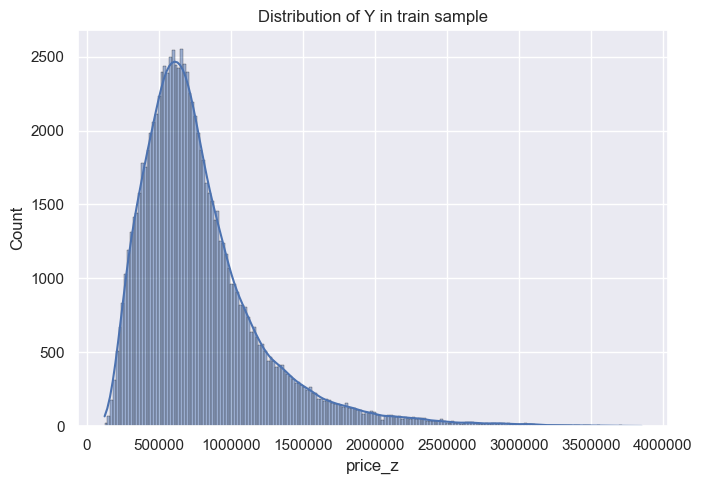

In [178]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(df_train['price_z'], kde = True, edgecolor='black')
plt.title('Distribution of Y in train sample')
# plt.xlabel('')
# plt.ylabel('')
# plt.grid()
# plt.xscale('log')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

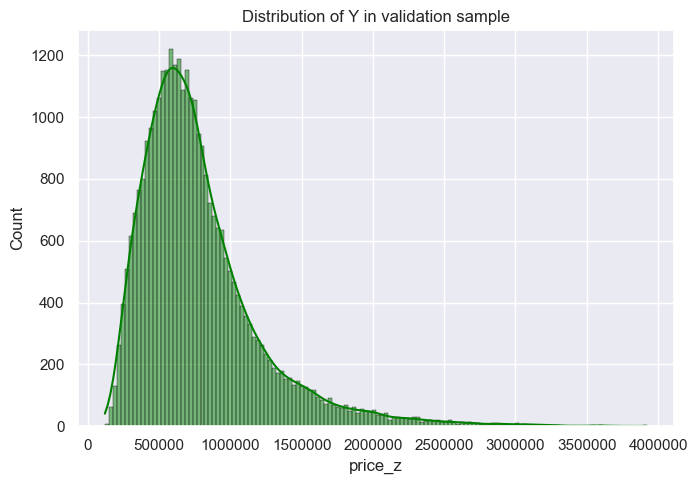

In [180]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(df_valid['price_z'], kde = True, edgecolor='black', color='green')
plt.title('Distribution of Y in validation sample')
# plt.xlabel('')
# plt.ylabel('')
# plt.grid()
# plt.xscale('log')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

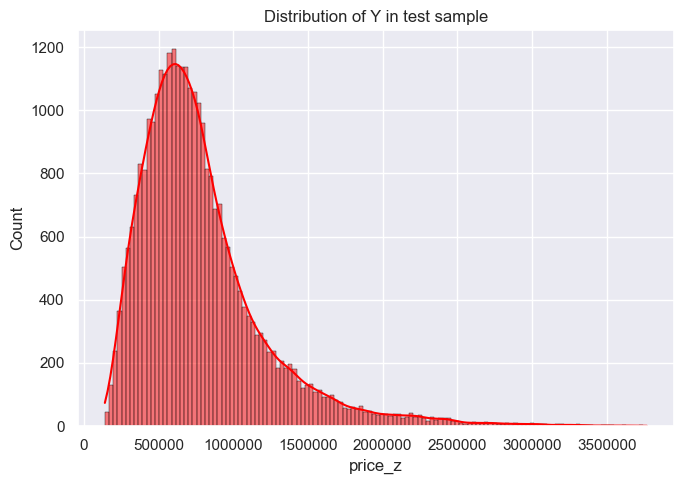

In [186]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(df_test['price_z'], kde = True, edgecolor='black', color='red')
plt.title('Distribution of Y in test sample')
# plt.xlabel('')
# plt.ylabel('')
# plt.grid()
# plt.xscale('log')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

<Figure size 700x500 with 0 Axes>

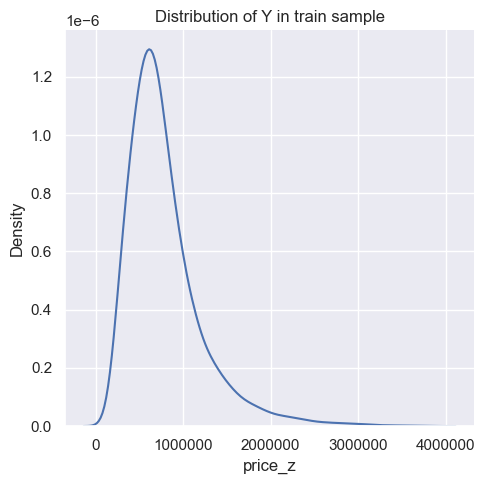

In [202]:
plt.figure(figsize=(7, 5))
sns.displot(df_train, x='price_z', kind="kde", bw_adjust=2)
plt.title('Distribution of Y in train sample')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

<Figure size 700x500 with 0 Axes>

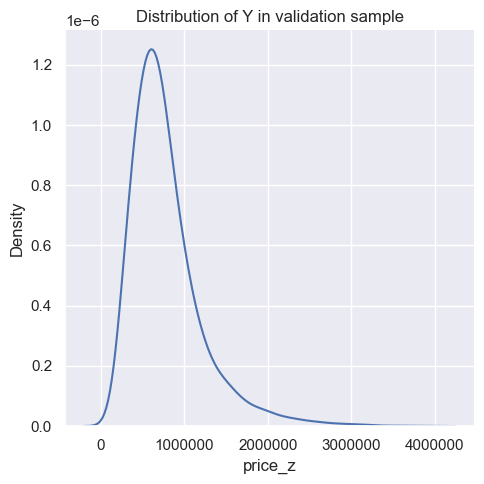

In [204]:
plt.figure(figsize=(7, 5))
sns.displot(df_valid, x='price_z', kind="kde", bw_adjust=2)
plt.title('Distribution of Y in validation sample')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

<Figure size 700x500 with 0 Axes>

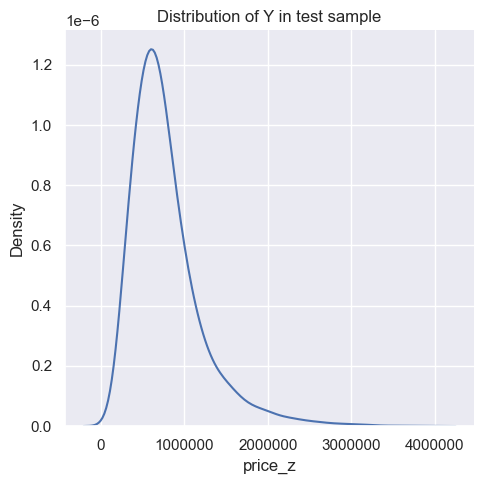

In [206]:
plt.figure(figsize=(7, 5))
sns.displot(df_valid, x='price_z', kind="kde", bw_adjust=2)
plt.title('Distribution of Y in test sample')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

---

You can observe that all Y variables in different samples are right skewed. In Feature Engineering section we will work on methods to correct this for better model stability

In [209]:
with open('../Data/after_preparation_1.pkl', 'wb') as f:
    pickle.dump(df_train, f)
    pickle.dump(df_valid, f)
    pickle.dump(df_test, f)